## LAB 2 - TASK 2 submission. ML 2023-24.


FILL UP THIS BOX WITH YOUR DETAILS

**NAME AND NIP**: Luis Calderón Robustillo 896238, Andrés Martínez Silva 904843


### FILL UP THIS BRIEF DESCRIPTION of your TOY DATASET:

* Number of Classes: 5
* Name of the classes: Abyssinian, american_bulldog, american_pit_bull_terrier, basset_hound, beagle
* Source of the classes: oxford-iiit-pet


## 2. Training from scratch

In this exercise we are building a small conv net to train from scratch using Tensorflow.Keras APIs

## Get data and tensorflow imports ready

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt

In [ ]:
# GET YOUR IMAGES READY

# OPTION A: upload and unzip, untar ... images if necessary (not recommended ... it'll only last one session)
#!tar -xvzf images.tar.gz
# !unzip data.zip
!ls

# OPTION B: mount your google drive to point the code to find the data in your drive folders
# (instructions here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA)

from google.colab import drive
drive.mount('/content/drive')
print()

sample_data
Mounted at /content/drive



In [ ]:
# SOME HELPER FUNCTIONS TO VISUALIZE RESULTS
def vis_history(results_history):
    acc = results_history.history['accuracy']
    val_acc = results_history.history['val_accuracy']

    loss = results_history.history['loss']
    val_loss = results_history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## Defining and training the CNN
You need to train 3 versions of this model:
* First run and train the model given here by default.
* Then evaluate what happens if you remove Dropout layer and train again.
* Then add code to incorporate image augmentation to the network training.

Use this example to see how to easily add data augmentation as an additional layer to your model. https://www.tensorflow.org/tutorials/images/classification#data_augmentation

Think what data augmentation could be interesting for your classes and program the layer to get it.

In [ ]:
####### ***** TO-DO-LAB *****  #######
# make sure you config these params to fit what you want/need

# dimensions of our images.
img_width, img_height = 150, 150
# MODIFY THE PATH TO POINT TO YOUR DATA! locally here or in your mounted drive
data_dir = '/content/drive/MyDrive/ML/lab2/oxford-iiit-pet/data' # all in one folder and let the system do the split
nb_train_samples = 2000 # UPDATE WITH YOUR NUMBERS!!
nb_validation_samples = 800 # UPDATE WITH YOUR NUMBERS!!
epochs = 10 # 50 # UPDATE WITH YOUR NUMBERS!!
batch_size = 4 #16
num_classes = 5
####### ***** TO-DO-LAB *****  #######

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, #1
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# for more optimized handling of the data
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### *************** TO-DO-LAB *************** ####
# DEFINE a SECOND MODEL that does NOT INCLUDE DROPOUT, compile it and train it
# model2 = ...
#
# DEFINE a BETTER MODEL that INCLUDES DROPOUT AND AUGMENTATION, compile it and train it
# model3 = ...
#### *************** END TO-DO-LAB *************** ####

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model.save_weights('first_try.h5')


## removing dropout layer
model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


model2.save_weights('second_try.h5')

#data aumentation
model3 = Sequential([
  layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model3.summary()

history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


model3.save_weights('third_try.h5')

Found 162 files belonging to 5 classes.
Using 130 files for training.
Found 162 files belonging to 5 classes.
Using 32 files for validation.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 75, 75, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                       

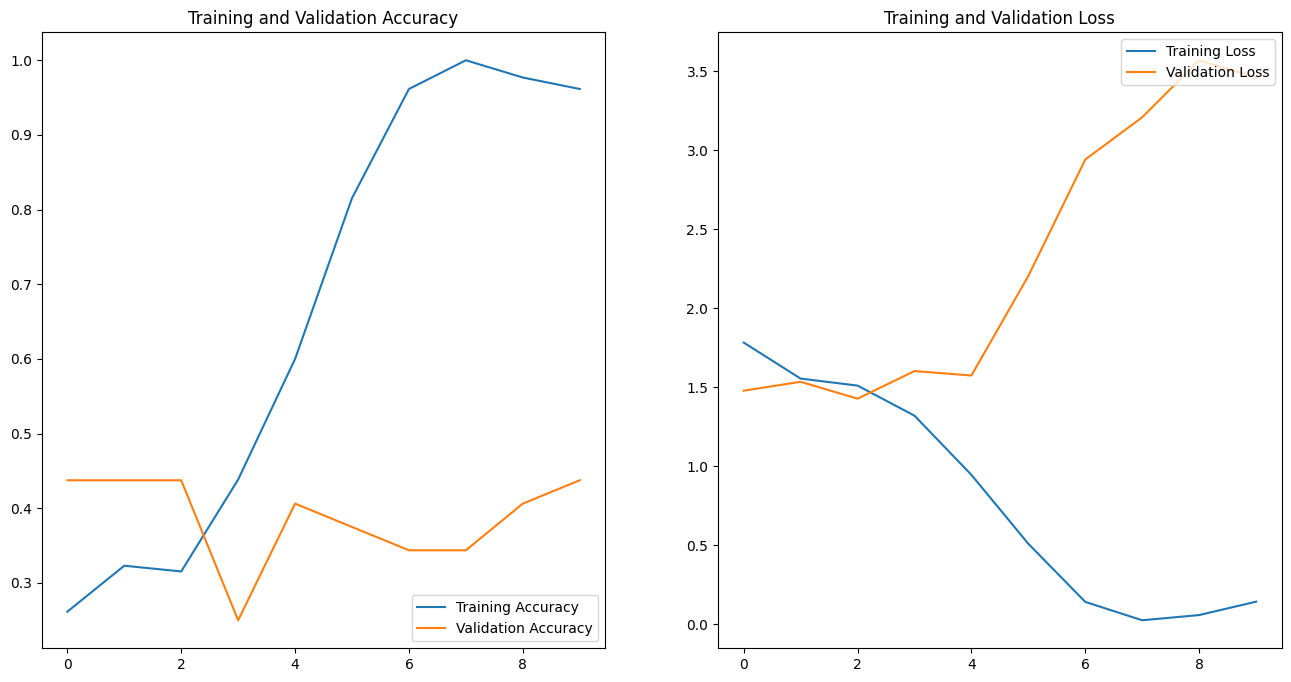

In [ ]:
# VISUALIZE INITIAL RESULTS
vis_history(history)

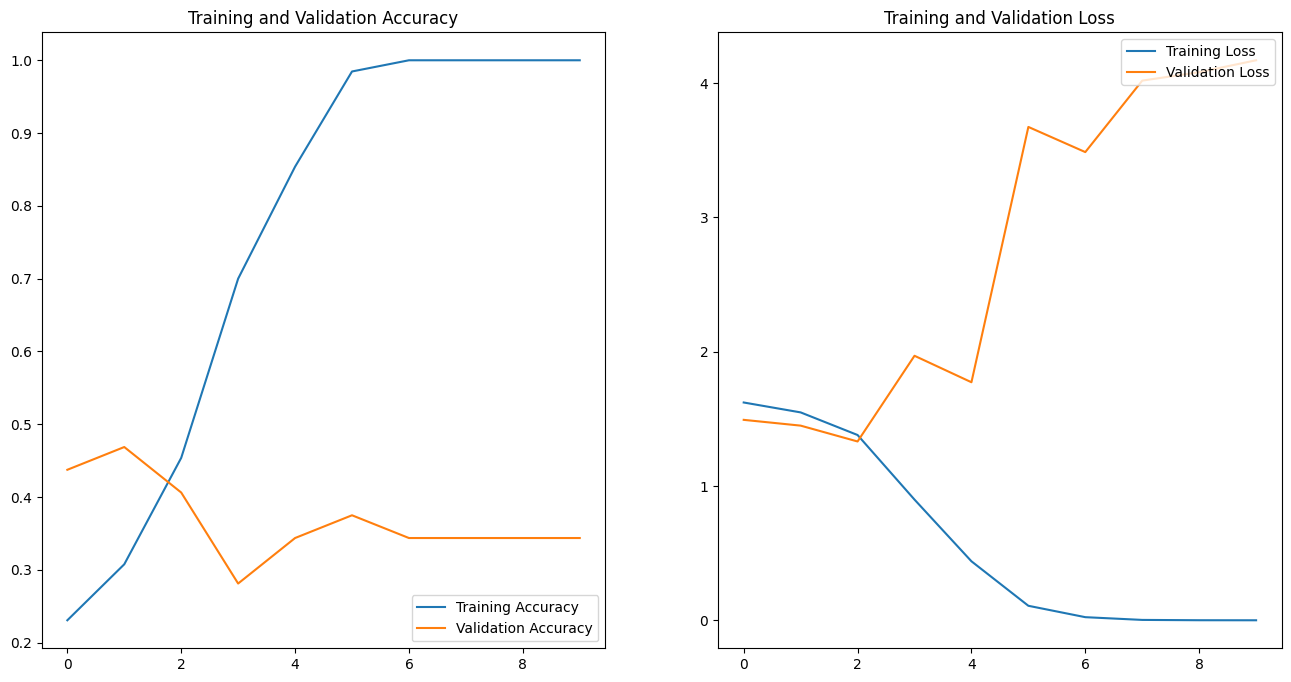

In [ ]:
# PLOT HERE YOUR RESULTS WITHOUT DROPOUT
vis_history(history2)

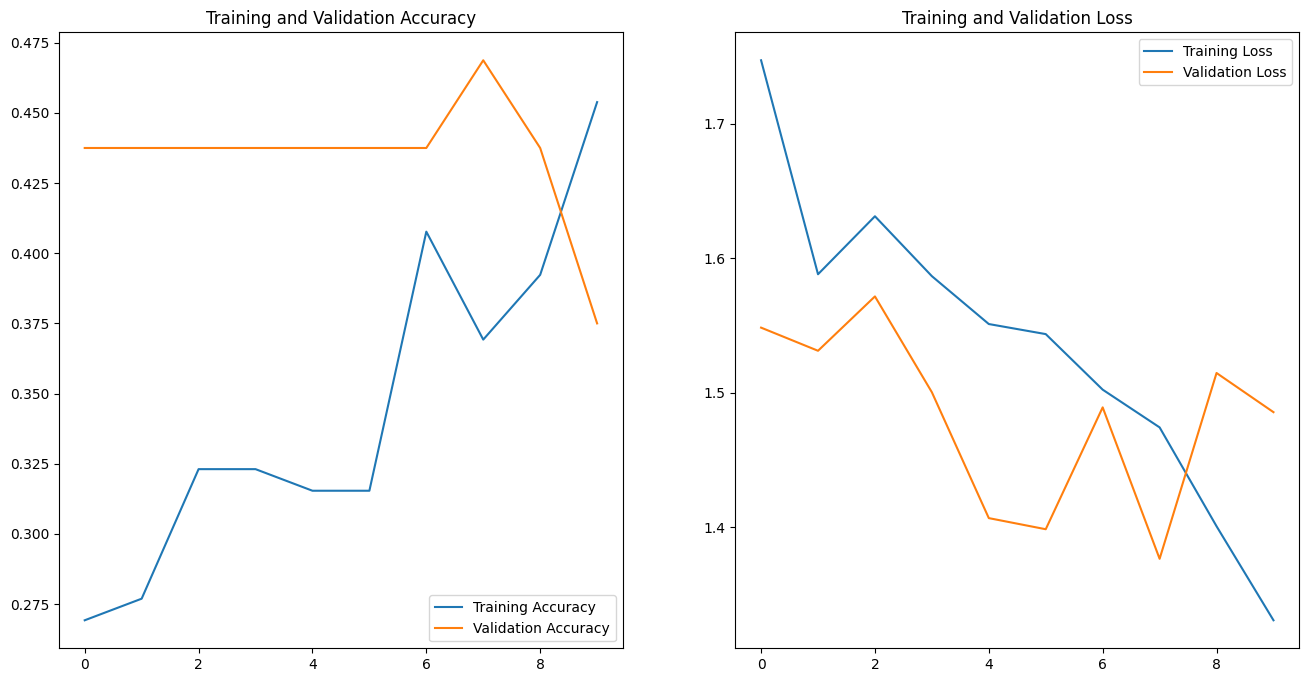

In [ ]:
# PLOT HERE YOUR RESULTS INCLUDING DROPOUT and AUGMENTATION
vis_history(history3)

### **QUESTION:** briefly discuss the results of the CNN with the different variations (with/without augmentation, with/without dropout). (maximum of 5 lines)

ANSWER: Without dropout, the model showcases similar values for training. However, its effect on reducing overfitting can be seen in how accuracy and loss values improve during validation when this layer is considered. Additionally, the model using data augmentation significantly improves our results. We can infer an even stronger improvement regarding overfitting from the better convergence rate of the loss function and improved accuracy during validation. Accuracy/loss values during training become worse but more realistic. This is due to the data augmentation stage diversifying our dataset by applying a sequence of transformations to the original dataset, like rotations, zooms and flips.